In [1]:
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np
from src.utils import DataParser
from src.detections import Detector
import pandas as pd

In [21]:
model = YOLO(r'../training/runs/detect/train4/weights/best.pt')

In [3]:
model.val()

Ultralytics 8.3.8  Python-3.12.6 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12288MiB)
YOLO11m summary (fused): 303 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs


val: Scanning C:\Users\Marcin\PycharmProjects\inzynierka\datasets\football_data\valid\labels.cache... 41286 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41286/41286 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2581/2581 [07:57<00:00,  5.41it/s]


                   all      41286     714570      0.617      0.567      0.541      0.317
                player      41286     591314      0.838      0.782      0.874      0.541
                  ball      38797      39258      0.601      0.152      0.192     0.0672
            goalkeeper      24798      24886      0.807      0.733      0.805      0.484
               referee      37453      59112      0.223      0.599      0.292      0.177
Speed: 0.1ms preprocess, 3.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000205983B54C0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

In [5]:
img = '../data/SoccerNetGS/gamestate-2024/test/SNGS-116/img1/000421.jpg'
img_arr: np.ndarray = cv2.imread(img)

In [8]:
directory = '../data/SoccerNetGS/gamestate-2024/test'
data_parser = DataParser(directory)
df = data_parser.parse_data_to_df()

Wczytywanie danych...


100%|██████████| 50/50 [00:09<00:00,  5.42it/s]


Tworzenie DataFrame...


100%|██████████| 49/49 [00:03<00:00, 14.81it/s]


In [9]:
df.head()

,image_id,track_id,supercategory,category_id,attributes_role,attributes_jersey,attributes_team,bbox_image_x,bbox_image_y,bbox_image_x_center,...,bbox_pitch_x_bottom_right,bbox_pitch_y_bottom_right,bbox_pitch_x_bottom_middle,bbox_pitch_y_bottom_middle,bbox_pitch_raw_x_bottom_left,bbox_pitch_raw_y_bottom_left,bbox_pitch_raw_x_bottom_right,bbox_pitch_raw_y_bottom_right,bbox_pitch_raw_x_bottom_middle,bbox_pitch_raw_y_bottom_middle
3116000001,3116000001,1,object,1,player,4,left,136,520,161.5,...,29.723592,-4.962108,29.486149,-5.143334,29.080245,-5.217584,29.589248,-4.830455,29.334593,-5.024136
3116000002,3116000001,2,object,1,player,93,left,478,565,503.5,...,30.964130,0.980532,30.722999,0.793530,30.467952,0.617342,30.946138,0.986441,30.706910,0.801787
3116000003,3116000001,3,object,1,player,25,right,565,518,589.0,...,34.566522,-2.456439,34.312718,-2.649419,34.005048,-2.839869,34.504631,-2.461507,34.254693,-2.650799
3116000004,3116000001,4,object,3,referee,None,None,468,433,491.0,...,38.742209,-11.349614,38.466332,-11.551332,38.167492,-11.767518,38.734982,-11.353659,38.451050,-11.560725
3116000005,3116000001,5,object,1,player,None,left,557,302,574.0,...,54.752061,-33.012322,54.453909,-33.207236,54.134561,-33.394207,54.753082,-32.989247,54.443607,-33.191867


In [12]:
df_img = df[df['image_id'] == '3116000421']
df_img

,image_id,track_id,supercategory,category_id,attributes_role,attributes_jersey,attributes_team,bbox_image_x,bbox_image_y,bbox_image_x_center,...,bbox_pitch_x_bottom_right,bbox_pitch_y_bottom_right,bbox_pitch_x_bottom_middle,bbox_pitch_y_bottom_middle,bbox_pitch_raw_x_bottom_left,bbox_pitch_raw_y_bottom_left,bbox_pitch_raw_x_bottom_right,bbox_pitch_raw_y_bottom_right,bbox_pitch_raw_x_bottom_middle,bbox_pitch_raw_y_bottom_middle
3116008448,3116000421,6,object,1,player,11,left,1032,444,1055.0,...,29.056947,7.162824,28.803553,6.993688,28.461129,7.453072,28.923146,7.745652,28.692142,7.599411
3116008449,3116000421,7,object,1,player,34,right,1421,438,1450.0,...,33.387240,9.455346,33.087327,9.257352,32.688427,9.494550,33.270966,9.860254,32.979896,9.677586
3116008450,3116000421,8,object,1,player,44,left,548,297,571.0,...,31.262448,-8.965687,30.934604,-9.174515,30.590323,-9.200031,31.186433,-8.833927,30.888257,-9.017221
3116008451,3116000421,10,object,1,player,20,right,1047,590,1074.0,...,24.210890,14.686584,23.983674,14.534830,23.528797,15.169887,23.975871,15.451063,23.752284,15.310617
3116008452,3116000421,12,object,1,player,31,right,709,291,734.5,...,33.664671,-8.168685,33.352847,-8.369251,32.895745,-8.295117,33.563656,-7.879779,33.229654,-8.087700
3116008453,3116000421,13,object,1,player,14,right,267,234,292.0,...,31.696742,-20.036198,31.350658,-20.242014,30.887101,-20.314785,31.623980,-19.892743,31.255226,-20.104331
3116008454,3116000421,15,object,1,player,8,left,214,402,266.0,...,22.799072,-0.407708,22.360667,-0.699078,21.657934,-0.834236,22.736918,-0.147982,22.196288,-0.491807
3116008455,3116000421,16,object,1,player,36,right,1338,677,1380.0,...,23.877379,19.957751,23.577339,19.761418,23.206959,20.227590,23.831943,20.605086,23.519449,20.416816
3116008456,3116000421,17,object,1,player,36,left,78,752,140.0,...,14.216303,17.053685,13.818937,16.758390,12.917639,17.182759,13.709952,17.745323,13.312623,17.464258
3116008457,3116000421,18,object,1,player,8,right,501,363,542.0,...,27.132988,-1.833168,26.771167,-2.069420,26.284506,-2.184216,27.210415,-1.602300,26.747006,-1.893676


In [16]:
class_color_mapping = {
    'ball': (255, 0, 0),
    'player': (0, 255, 0),
    'referee': (0, 0, 255),
    'goalkeeper': (255, 255, 0),
}

In [78]:
# draw on image gt bboxes
gt_image = img_arr.copy()
for index, row in df_img.iterrows():
    x1, y1, x2, y2 = row['bbox_image_x'], row['bbox_image_y'], row['bbox_image_x'] + row['bbox_image_w'], row['bbox_image_y'] +  row['bbox_image_h']
    cv2.rectangle(gt_image, (x1, y1), (x2, y2), class_color_mapping[row['attributes_role']], 2)
cv2.imwrite('../figures/gt_bboxes_image.jpg', gt_image)

True

In [28]:
preds = model.predict(img_arr)


0: 384x640 11 players, 50.0ms
Speed: 3.0ms preprocess, 50.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


In [70]:
preds[0].boxes.xyxy.cpu().tolist()[0]

1343.1116943359375 680.0140380859375 1421.2791748046875 883.7763671875


In [49]:
preds[0].boxes.cls.cpu().numpy()
classes = ['player' for _ in range(len(preds[0].boxes))]

In [77]:
predicted_img = img_arr.copy()
for row, det_class in zip(preds[0].boxes.xyxy.cpu().tolist(), classes):
    x1, y1, x2, y2 = int(row[0]), int(row[1]), int(row[2]), int(row[3])
    cv2.rectangle(predicted_img, (x1, y1), (x2, y2), class_color_mapping[det_class], 2)
cv2.imwrite('../figures/pred_bboxes_image.jpg', predicted_img)

True

In [2]:
data = r"..\training\runs\detect\train4\results.csv"
df_runs: pd.DataFrame = pd.read_csv(data)

In [8]:
df_runs['         train/box_loss']

0     1.32060
1     1.27220
2     1.26640
3     1.25010
4     1.19830
       ...   
95    0.60185
96    0.59503
97    0.58944
98    0.58365
99    0.57759
Name:          train/box_loss, Length: 100, dtype: float64

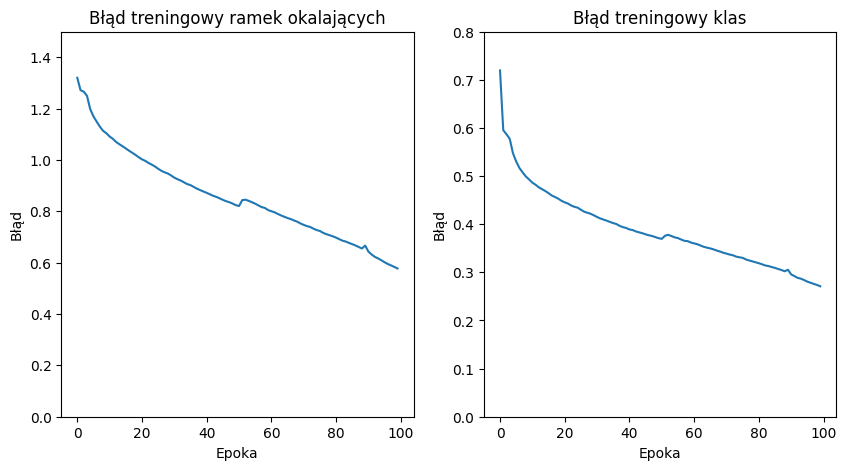

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df_runs['         train/box_loss'])
plt.xlabel('Epoka')
plt.ylabel('Błąd')
plt.title('Błąd treningowy ramek okalających')
plt.ylim(0, 1.5)
plt.subplot(1, 2, 2)
plt.plot(df_runs['         train/cls_loss'])
plt.xlabel('Epoka')
plt.ylabel('Błąd')
plt.title('Błąd treningowy klas')
plt.ylim(0, 0.8)
plt.savefig('../figures/błędy.png', dpi=500)